# Distinguishing Adult and Youth Faces Using Convolutional Neural Networks


## Notebook CNN3: Second Convolutional Neural Network
This section details the creation of a Convolutional Neural Network (CNN) that introduces regularization techniques to mitigate overfitting. In this model, L2 regularization and dropout layers are applied to prevent the model from becoming too complex and fitting the training data too closely. This iteration aims to evaluate the impact of regularization on the model's performance and generalizability. Despite these efforts, the model's performance decreased, indicating that the regularization parameters may need further tuning. Future iterations will continue to refine these parameters and explore additional methods to balance model complexity and accuracy.

### Important Considerations
* These models require significant computing power. Each took 10 hours to fit using an M3 chip and 18GB of memory.
* Consider making a separate keras environment
* Consider working in GoogleColab


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.utils import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


import keras
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from tensorflow.keras.applications import VGG19


In [2]:
data_dir = '/Users/marta/Documents/data_dir/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

Found 14633 files belonging to 2 classes.
Using 11707 files for training.
Found 14633 files belonging to 2 classes.
Using 2926 files for validation.


In [ ]:
# Helped by Argishti Ovsepyan 
classes = np.array(['PLP', 'POR'])
y = [classes[0]] * 5422 + [classes[1]] * 9211
class_weights = compute_class_weight('balanced', classes=classes, y=y)

class_weights_dict = class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

In [5]:
from tensorflow.keras.layers import Dropout

# Add dropout layers
cnn3 = Sequential()

cnn3.add(Conv2D(512, 3, activation='relu', input_shape=(256, 256, 3)))
cnn3.add(MaxPooling2D(2, padding='same'))
cnn3.add(Dropout(0.5))

cnn3.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn3.add(MaxPooling2D(2, padding='same'))
cnn3.add(Dropout(0.5))

cnn3.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn3.add(MaxPooling2D(2, padding='same'))
cnn3.add(Dropout(0.5))

cnn3.add(Flatten())
cnn3.add(Dense(1, activation='sigmoid'))

cnn3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history3 = cnn3.fit(train_ds, epochs=10, validation_data=val_ds, class_weight=class_weights_dict)


Epoch 1/10


2024-06-11 09:07:35.443404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype double and shape [2]
	 [[{{node Placeholder/_17}}]]
2024-06-11 09:07:35.443659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11707]
	 [[{{node Placeholder/_0}}]]
2024-06-11 09:07:35.477107: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


366/366 [==============================] - ETA: 0s - loss: 13.0957 - acc: 0.5374 

2024-06-11 10:09:01.585013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2926]
	 [[{{node Placeholder/_4}}]]
2024-06-11 10:09:01.585158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2926]
	 [[{{node Placeholder/_0}}]]


366/366 [==============================] - 3895s 11s/step - loss: 13.0957 - acc: 0.5374 - val_loss: 4.5146 - val_acc: 0.5335
Epoch 2/10
366/366 [==============================] - 3831s 10s/step - loss: 3.9610 - acc: 0.5617 - val_loss: 3.5082 - val_acc: 0.5284
Epoch 3/10
366/366 [==============================] - 4628s 13s/step - loss: 3.1932 - acc: 0.5623 - val_loss: 2.8863 - val_acc: 0.4979
Epoch 4/10
366/366 [==============================] - 4082s 11s/step - loss: 2.6310 - acc: 0.5821 - val_loss: 2.4167 - val_acc: 0.5526
Epoch 5/10
366/366 [==============================] - 4390s 12s/step - loss: 2.2252 - acc: 0.5826 - val_loss: 2.0468 - val_acc: 0.5810
Epoch 6/10
366/366 [==============================] - 4412s 12s/step - loss: 1.9011 - acc: 0.5870 - val_loss: 1.7670 - val_acc: 0.5701
Epoch 7/10
366/366 [==============================] - 4329s 12s/step - loss: 1.6415 - acc: 0.5995 - val_loss: 1.5524 - val_acc: 0.5318
Epoch 8/10
366/366 [==============================] - 3907s 11s/s

In [9]:
cnn3.save('./saved_models/cnn3.h5')
pd.DataFrame(history3.history).to_csv('./saved_models//history3.csv', index=False)

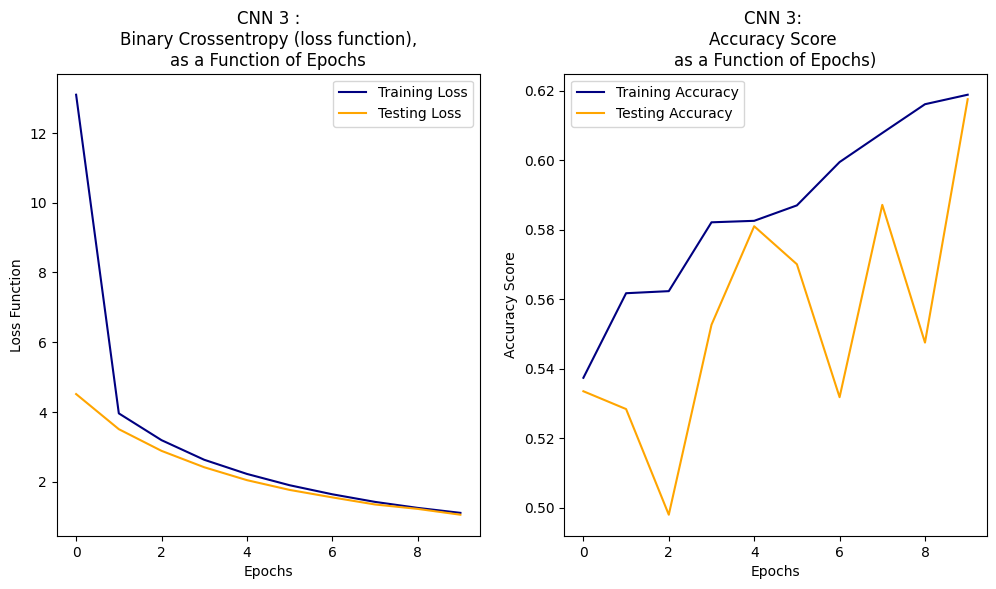

In [10]:
# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history3.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history3.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 3 :
Binary Crossentropy (loss function),
as a Function of Epochs''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history3.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history3.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 3: 
Accuracy Score 
as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

**CNN 3**: Regularization techniques such as L2 regularization and dropout were introduced in this model to combat overfitting. Unfortunately, these adjustments led to a decrease in overall performance. This suggests that the regularization parameters were too strong, resulting in underfitting where the model couldn't adequately capture the data patterns.